<a href="https://colab.research.google.com/github/yash2163/ExploratoryDataAnalysisTheoryDa-21BDS0370-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/GSS7402.csv")


Data Transformation and Cleaning

In [30]:
# Check initial data overview
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNames           9120 non-null   int64  
 1   Kids               9120 non-null   int64  
 2   Age                9120 non-null   int64  
 3   Education          9120 non-null   int64  
 4   Year               9120 non-null   int64  
 5   Siblings           9120 non-null   int64  
 6   AgeFirstBirth      9120 non-null   float64
 7   Ethnicity_other    9120 non-null   bool   
 8   CityAt16_yes       9120 non-null   bool   
 9   LowIncomeAt16_yes  9120 non-null   bool   
 10  Immigrant_yes      9120 non-null   bool   
 11  KMeans_Cluster     9120 non-null   int32  
 12  PCA1               9120 non-null   float64
 13  PCA2               9120 non-null   float64
 14  Cluster            9120 non-null   int32  
dtypes: bool(4), float64(3), int32(2), int64(6)
memory usage: 748.2 KB
None
 

In [11]:
# Rename columns for better readability
data.rename(columns={
    'index': 'Index',
    'rownames': 'RowNames',
    'kids': 'Kids',
    'age': 'Age',
    'education': 'Education',
    'year': 'Year',
    'siblings': 'Siblings',
    'agefirstbirth': 'AgeFirstBirth',
    'ethnicity': 'Ethnicity',
    'city16': 'CityAt16',
    'lowincome16': 'LowIncomeAt16',
    'immigrant': 'Immigrant'
}, inplace=True)


In [12]:
# Handling Missing Values

# Check for missing values
print(data.isnull().sum())

# Fill missing values in 'AgeFirstBirth' with the mean value of the column
data['AgeFirstBirth'].fillna(data['AgeFirstBirth'].mean(), inplace=True)


RowNames            0
Kids                0
Age                 0
Education           0
Year                0
Siblings            0
AgeFirstBirth    5808
Ethnicity           0
CityAt16            0
LowIncomeAt16       0
Immigrant           0
dtype: int64


<ipython-input-12-e3b8e6d3bb0e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AgeFirstBirth'].fillna(data['AgeFirstBirth'].mean(), inplace=True)


In [13]:
# Converting Data Types

# Convert categorical columns to 'category' data type
categorical_columns = ['Ethnicity', 'CityAt16', 'LowIncomeAt16', 'Immigrant']
for col in categorical_columns:
    data[col] = data[col].astype('category')


In [14]:
# Encoding Categorical Variables

# Encode categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [15]:
data.head(10)

,RowNames,Kids,Age,Education,Year,Siblings,AgeFirstBirth,Ethnicity_other,CityAt16_yes,LowIncomeAt16_yes,Immigrant_yes
0,1,0,25,14,2002,1,22.630737,False,False,False,False
1,2,1,30,13,2002,4,19.000000,False,True,False,False
2,3,1,55,2,2002,1,27.000000,False,False,False,True
3,4,2,57,16,2002,1,22.000000,False,False,False,False
4,5,2,71,12,2002,6,29.000000,False,True,False,False
5,6,0,19,13,2002,1,22.630737,True,True,False,False
6,7,0,71,12,2002,1,22.630737,False,False,False,False
7,8,0,30,12,2002,5,22.630737,True,False,False,True
8,9,1,35,12,2002,0,21.000000,False,True,False,True
9,10,3,51,12,2002,1,20.000000,False,True,False,False


Statistical Analysis


In [17]:
# Basic statistics for numerical columns
print("Basic Statistics:")
print(data.describe())

# Skewness and Kurtosis for numerical columns
num_columns = ['Kids', 'Age', 'Education', 'Siblings', 'AgeFirstBirth']
for col in num_columns:
    skewness = data[col].skew()
    kurtosis = data[col].kurtosis()
    print(f"{col} - Skewness: {skewness}, Kurtosis: {kurtosis}")


Basic Statistics:
          RowNames         Kids          Age    Education         Year  \
count  9120.000000  9120.000000  9120.000000  9120.000000  9120.000000   
mean   4560.500000     2.076096    46.082018    12.635088  1990.288596   
std    2632.861561     1.805099    17.923889     2.955190     9.096915   
min       1.000000     0.000000    18.000000     0.000000  1974.000000   
25%    2280.750000     1.000000    31.000000    12.000000  1982.000000   
50%    4560.500000     2.000000    43.000000    12.000000  1994.000000   
75%    6840.250000     3.000000    59.000000    14.000000  1998.000000   
max    9120.000000     8.000000    89.000000    20.000000  2002.000000   

          Siblings  AgeFirstBirth  
count  9120.000000    9120.000000  
mean      4.050658      22.630737  
std       3.246137       2.928010  
min       0.000000       9.000000  
25%       2.000000      22.630737  
50%       3.000000      22.630737  
75%       6.000000      22.630737  
max      35.000000      42.

Univariate, Bivariate, and Multivariate Analysis

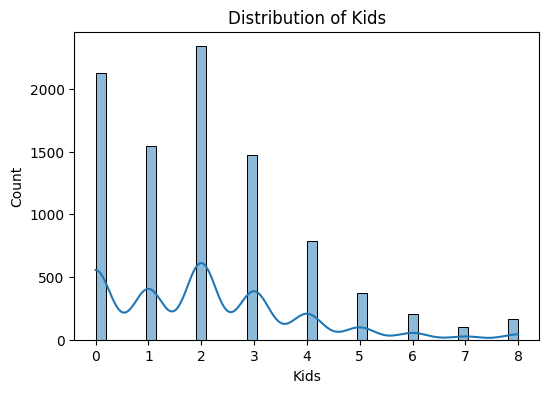

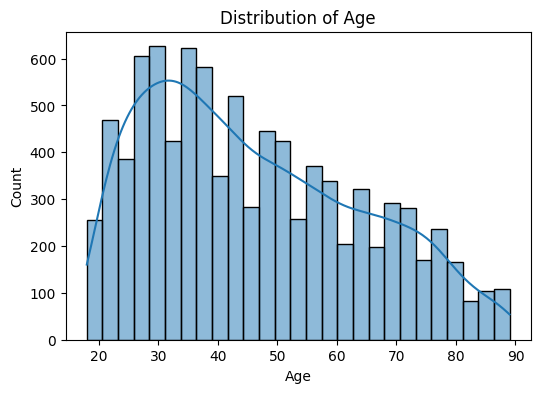

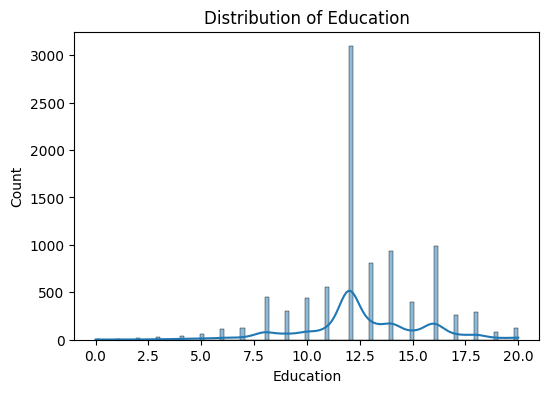

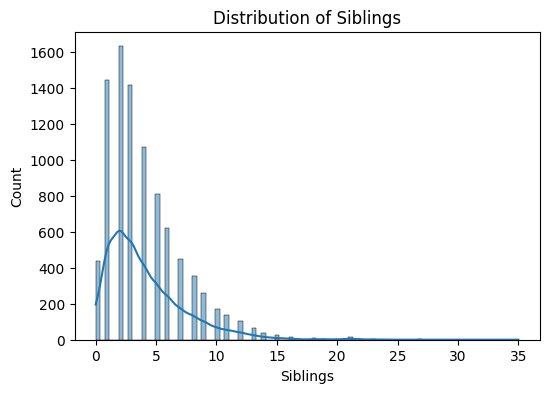

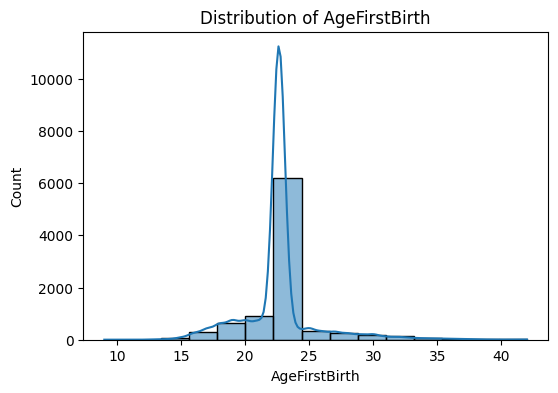

In [18]:
# Univariate Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Histograms and density plots for numerical variables
for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


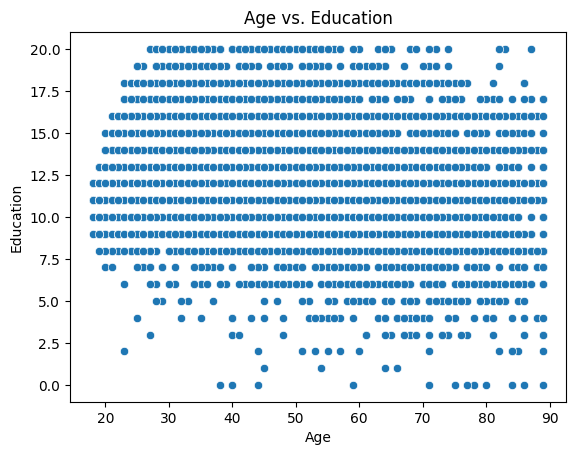

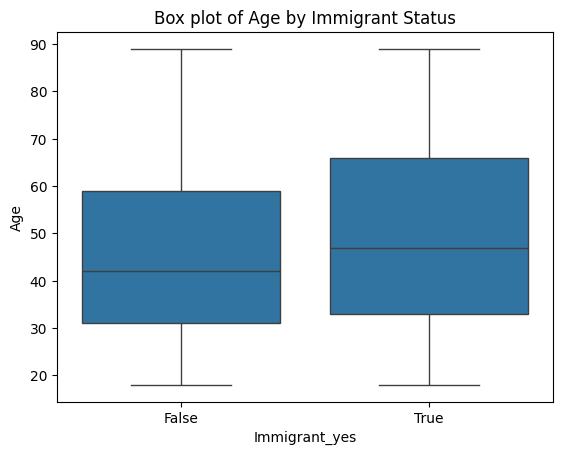

In [19]:
# Bivariate Analysis

# Scatter plot for Age vs. Education
sns.scatterplot(x='Age', y='Education', data=data)
plt.title('Age vs. Education')
plt.show()

# Box plot of Age across Immigrant Status
sns.boxplot(x='Immigrant_yes', y='Age', data=data)
plt.title('Box plot of Age by Immigrant Status')
plt.show()


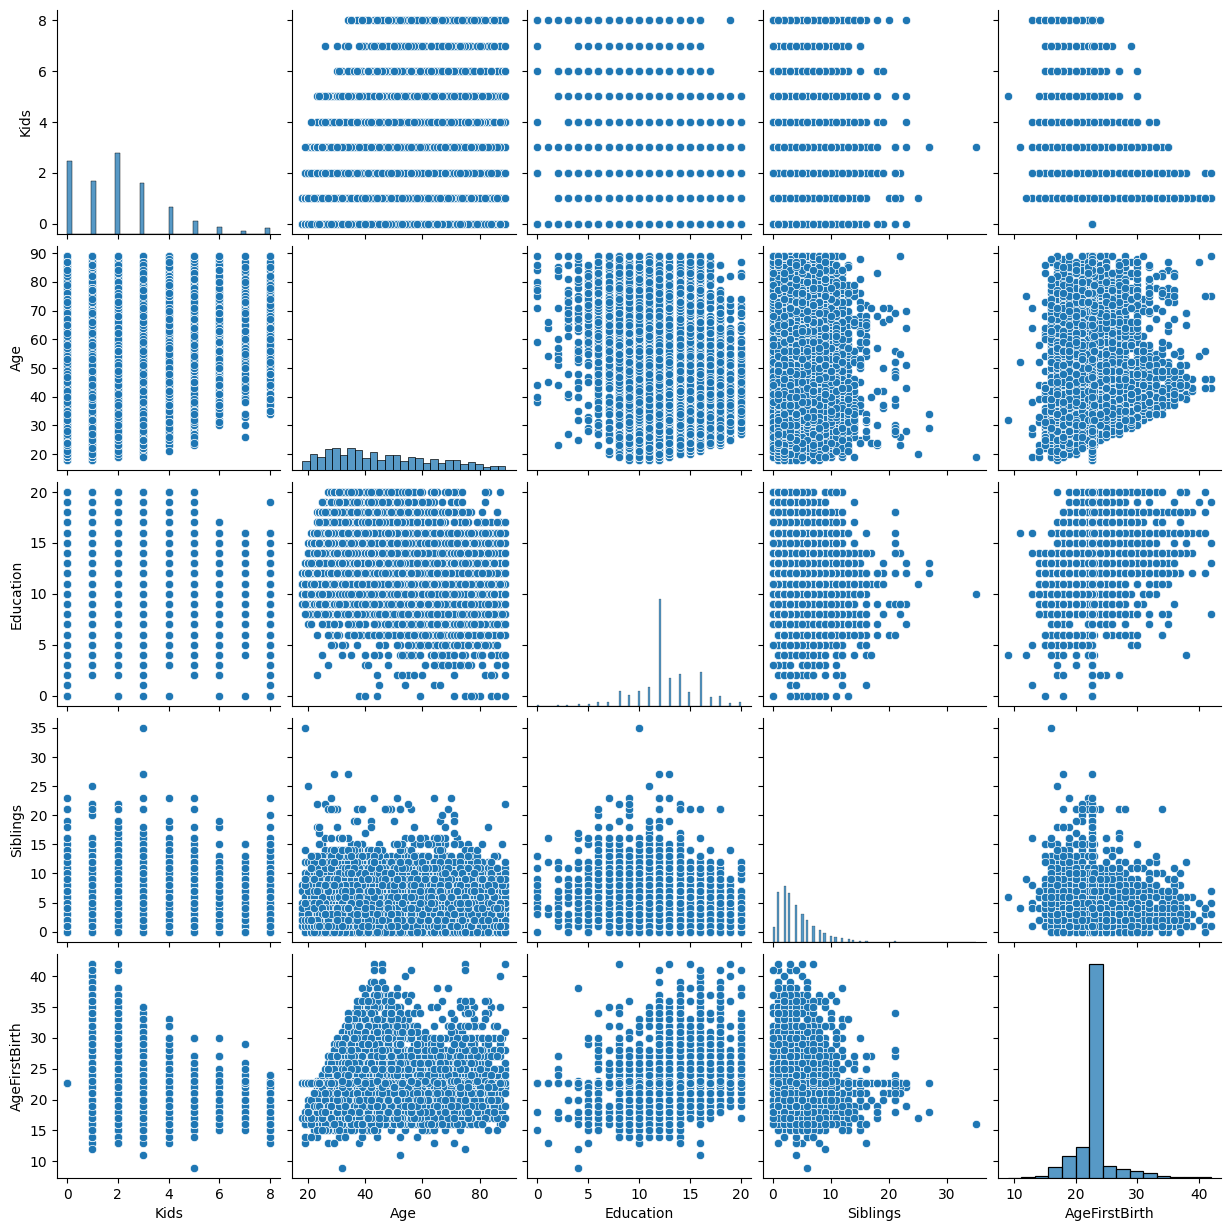

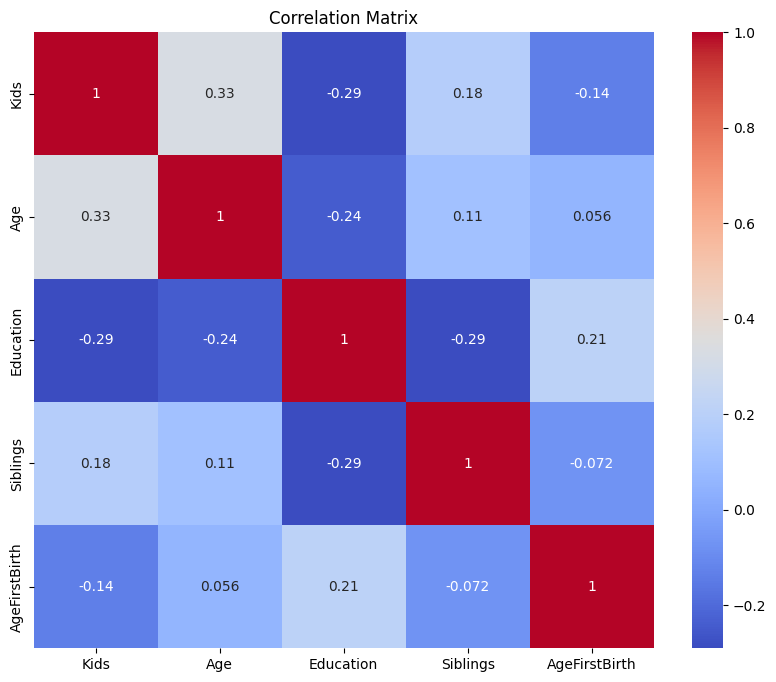

In [20]:
# Multivariate Analysis

# Pairplot for multivariate analysis of numerical variables
sns.pairplot(data[num_columns])
plt.show()

# Heatmap for correlation matrix of numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Time Series Analysis

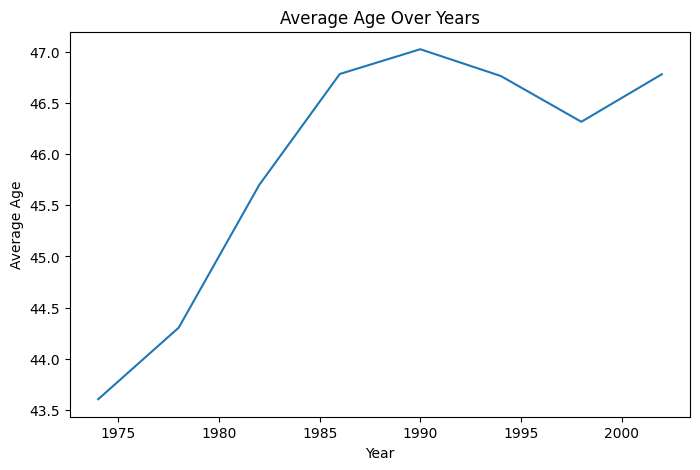

In [21]:
# Example: Line plot for average Age over the years (if `Year` has multiple entries)
time_data = data.groupby('Year')['Age'].mean()
plt.figure(figsize=(8, 5))
time_data.plot()
plt.title("Average Age Over Years")
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.show()


Statistical Data Analysis

In [22]:
# 1D Statistical Data Analysis

# Detailed descriptive statistics
for col in num_columns:
    print(f"{col} Mean:", data[col].mean())
    print(f"{col} Median:", data[col].median())
    print(f"{col} Mode:", data[col].mode()[0])
    print(f"{col} Variance:", data[col].var())
    print(f"{col} Standard Deviation:", data[col].std())
    print(f"{col} Min:", data[col].min())
    print(f"{col} Max:", data[col].max())
    print("\n")


Kids Mean: 2.0760964912280704
Kids Median: 2.0
Kids Mode: 2
Kids Variance: 3.2583823922675412
Kids Standard Deviation: 1.8050989979132839
Kids Min: 0
Kids Max: 8


Age Mean: 46.08201754385965
Age Median: 43.0
Age Mode: 30
Age Variance: 321.2657803352551
Age Standard Deviation: 17.92388853835169
Age Min: 18
Age Max: 89


Education Mean: 12.635087719298246
Education Median: 12.0
Education Mode: 12
Education Variance: 8.73314748654678
Education Standard Deviation: 2.955189923938355
Education Min: 0
Education Max: 20


Siblings Mean: 4.050657894736842
Siblings Median: 3.0
Siblings Mode: 2
Siblings Variance: 10.537404984387933
Siblings Standard Deviation: 3.2461369324764986
Siblings Min: 0
Siblings Max: 35


AgeFirstBirth Mean: 22.63073671497585
AgeFirstBirth Median: 22.630736714975846
AgeFirstBirth Mode: 22.630736714975846
AgeFirstBirth Variance: 8.573241693433044
AgeFirstBirth Standard Deviation: 2.928009852004095
AgeFirstBirth Min: 9.0
AgeFirstBirth Max: 42.0





Ethnicity and Immigrant Contingency Table:
 Immigrant_yes    False  True 
Ethnicity_other              
False             6618    717
True              1504    281

Correlation between Numerical Columns:
                 Age  Education
Age        1.000000  -0.241843
Education -0.241843   1.000000

Mean Age by Immigrant Status:
 Immigrant_yes
False    45.628417
True     49.773547
Name: Age, dtype: float64

Row Profile:
 Immigrant_yes       False     True 
Ethnicity_other                    
False            0.902249  0.097751
True             0.842577  0.157423

Column Profile:
 Immigrant_yes       False     True 
Ethnicity_other                    
False            0.814824  0.718437
True             0.185176  0.281563

Chi-square Test:
 Chi2: 51.84455273183115, p-value: 6.007310499669102e-13


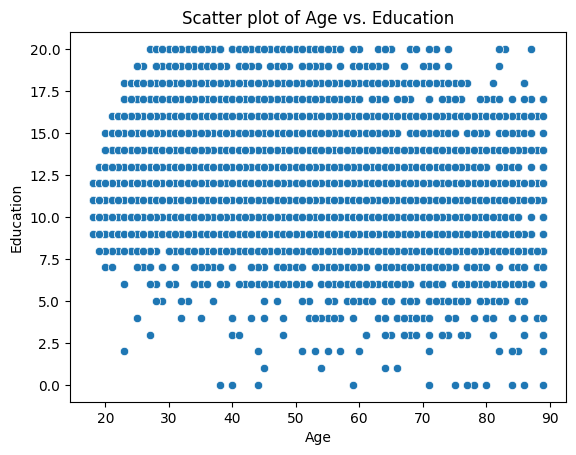

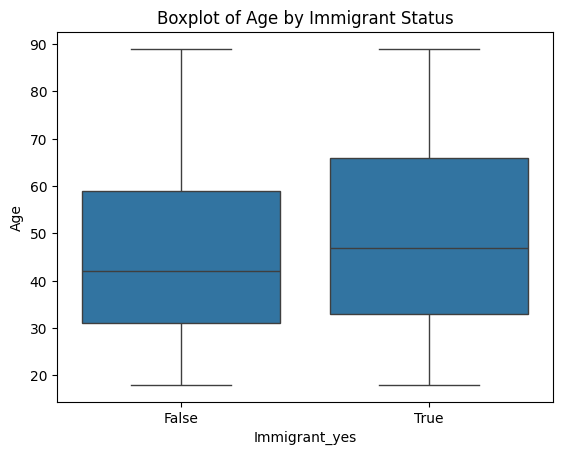

In [28]:
# 2D Statistical Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 2D Contingency Tables

# Categorical-Categorical
ethnicity_immigrant_table = pd.crosstab(data['Ethnicity_other'], data['Immigrant_yes'])
print("\nEthnicity and Immigrant Contingency Table:\n", ethnicity_immigrant_table)

# Numerical-Numerical: Correlation matrix
print("\nCorrelation between Numerical Columns:\n", data[['Age', 'Education']].corr())

# Categorical-Numerical: Mean Age grouped by Immigrant status
print("\nMean Age by Immigrant Status:\n", data.groupby('Immigrant_yes')['Age'].mean())

# 2-Way Contingency Table Profiles
# Row Profile
row_profile = ethnicity_immigrant_table.div(ethnicity_immigrant_table.sum(axis=1), axis=0)
print("\nRow Profile:\n", row_profile)

# Column Profile
col_profile = ethnicity_immigrant_table.div(ethnicity_immigrant_table.sum(axis=0), axis=1)
print("\nColumn Profile:\n", col_profile)

# Chi-square Test
chi2, p, dof, expected = chi2_contingency(ethnicity_immigrant_table)
print("\nChi-square Test:\n", f"Chi2: {chi2}, p-value: {p}")

# 2D Scatter Plot
sns.scatterplot(x='Age', y='Education', data=data)
plt.title("Scatter plot of Age vs. Education")
plt.show()

# 2D Boxplot
sns.boxplot(x='Immigrant_yes', y='Age', data=data)
plt.title("Boxplot of Age by Immigrant Status")
plt.show()



3-Way Contingency Table:
 Immigrant_yes                 False  True 
Ethnicity_other CityAt16_yes              
False           False          4075    303
                True           2543    414
True            False           752    116
                True            752    165


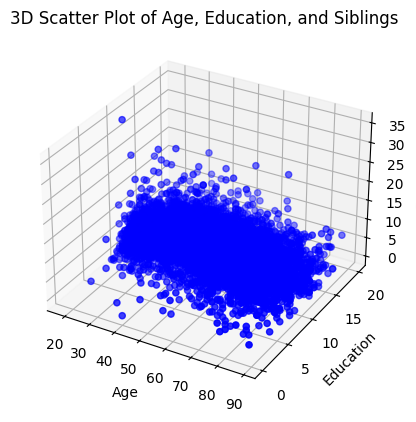

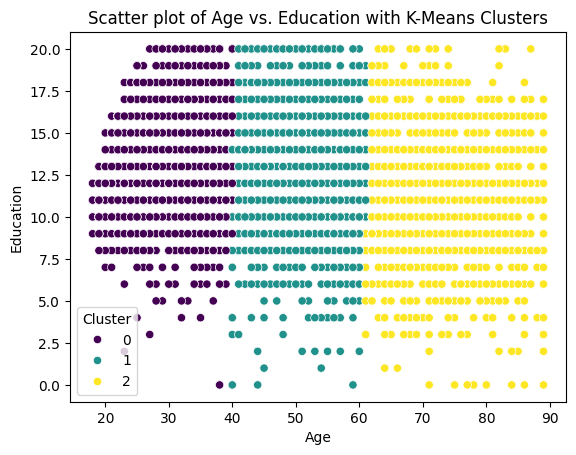

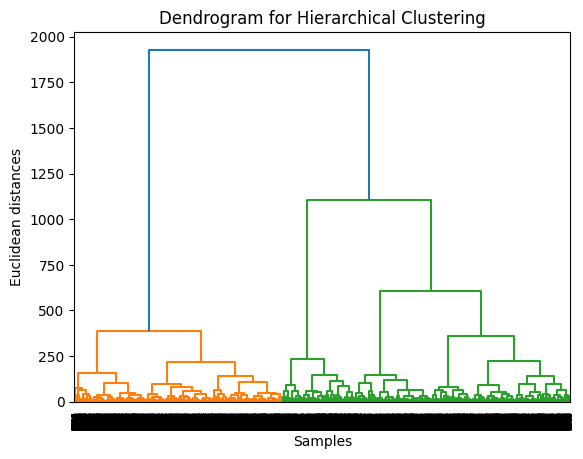

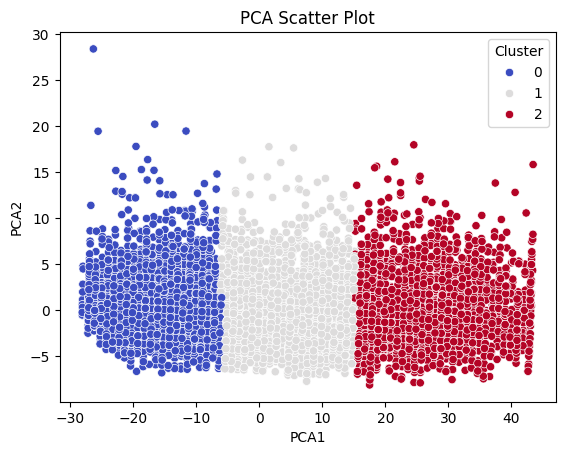

In [29]:
# ND Statistical Analysis
# Import additional libraries for ND analysis
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

# 3-Way Contingency Table
ethnicity_city_immigrant_table = pd.crosstab([data['Ethnicity_other'], data['CityAt16_yes']], data['Immigrant_yes'])
print("\n3-Way Contingency Table:\n", ethnicity_city_immigrant_table)

# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Education'], data['Siblings'], c='blue', marker='o')
ax.set_xlabel("Age")
ax.set_ylabel("Education")
ax.set_zlabel("Siblings")
plt.title("3D Scatter Plot of Age, Education, and Siblings")
plt.show()

# 3D Scatter Plot using Plotly
fig = px.scatter_3d(data, x='Age', y='Education', z='Siblings', color='Ethnicity_other')
fig.update_layout(title="3D Scatter Plot with Plotly")
fig.show()

# K-Means Clustering (example with 3 clusters)
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(data[['Age', 'Education', 'Siblings']])

# Scatter Plot with Clusters
sns.scatterplot(x='Age', y='Education', hue='Cluster', palette="viridis", data=data)
plt.title("Scatter plot of Age vs. Education with K-Means Clusters")
plt.show()

# Hierarchical Clustering Dendrogram
dendrogram = sch.dendrogram(sch.linkage(data[['Age', 'Education', 'Siblings']], method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.show()

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[['Age', 'Education', 'Siblings']])
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Scatter Plot of PCA
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette="coolwarm", data=data)
plt.title("PCA Scatter Plot")
plt.show()


Clustering Algorithms

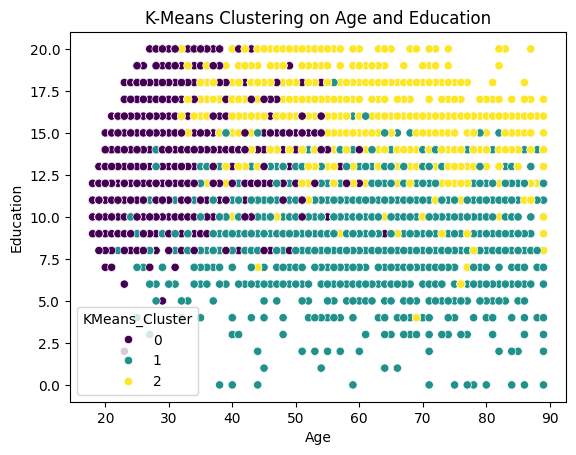

In [25]:
# K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[num_columns])

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Plot clusters
sns.scatterplot(x='Age', y='Education', hue='KMeans_Cluster', data=data, palette='viridis')
plt.title('K-Means Clustering on Age and Education')
plt.show()


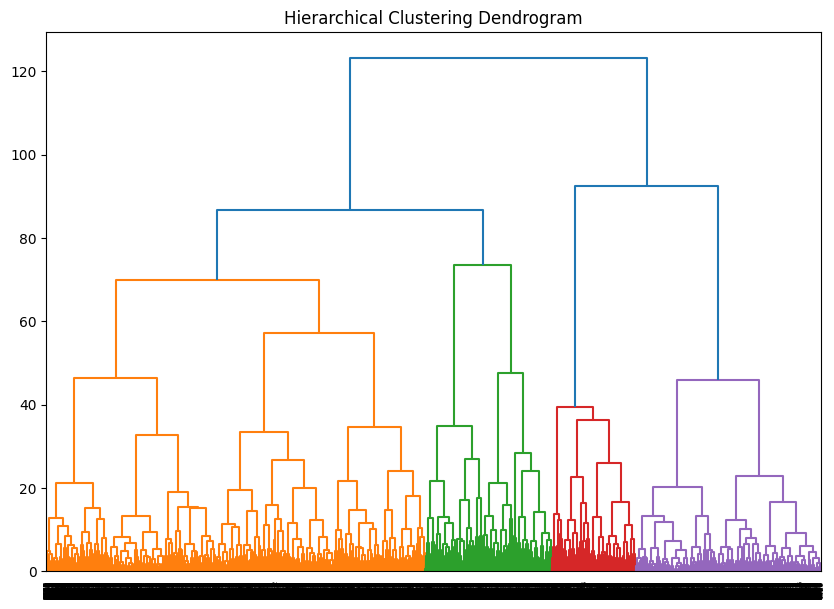

In [26]:
# Hierarchical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering
linkage_data = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_data)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


Principal Component Analysis (PCA)

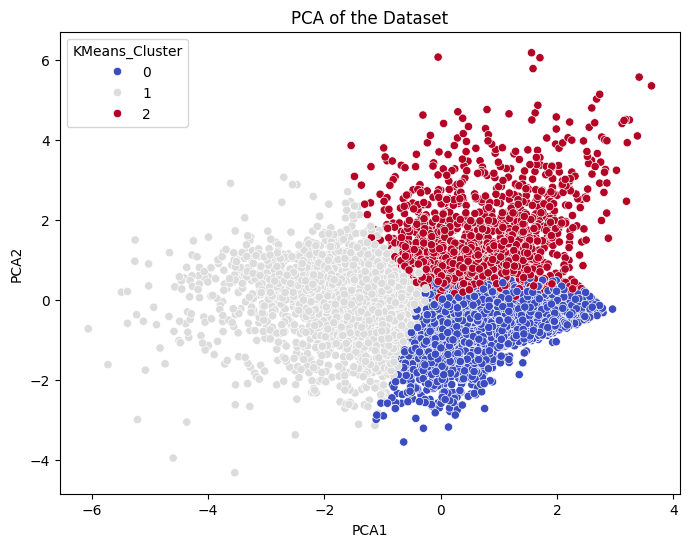

In [27]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Add PCA components to the dataframe for visualization
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=data, palette='coolwarm')
plt.title('PCA of the Dataset')
plt.show()
